# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** AHLAN SAYYID ALGHIFFARI
- **Email:** m248b4ky0188@bangkit.academy
- **ID Dicoding:** ahlanalghiffari

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap total jumlah pengguna sepeda dan apakah ada peningkatan signifikan dalam penggunaan sepeda selama musim tertentu?

- Bagaimana perbandingan jumlah penyewaan sepeda pada hari kerja dan akhir pekan? Apakah pengguna casual lebih sering menyewa sepeda pada akhir pekan dibandingkan hari kerja?

- Bagaimana dampak kondisi cuaca (*weathersit*) terhadap jumlah penyewaan sepeda harian?

## Import Semua Packages/Library yang Digunakan

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [56]:
bike_df = pd.read_csv("https://raw.githubusercontent.com/AhlanAlghiff/dataset/refs/heads/master/Bike-Sharing-Dataset/day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

Setelah memastikan berhasil mengimpor dataset file CSV dari URL, dapat diketahui bahwa dataset ini memuat informasi mengenai penggunaan sewa sepeda harian. Dataset ini berisi beberapa kolom dengan informasi lengkap sebagai berikut:

Dataset ini berisi jumlah penyewaan sepeda per hari antara tahun 2011 dan 2012 dalam sistem penyewaan sepeda di ibukota, beserta informasi cuaca dan musiman yang relevan.

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
  
  1: Clear, Few clouds, Partly cloudy, Partly cloudy
  
  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  
  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  
  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


### Assessing Data

Periksa informasi dari bike_df dataframe

In [57]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset ini terdiri dari 731 baris dan 16 kolom, mencakup informasi harian mengenai penggunaan sepeda, seperti tanggal (*dteday*), musim (*season*), status hari kerja (*workingday*), kondisi cuaca (*weathersit*), suhu (*temp* dan *atemp*), kelembapan (*hum*), kecepatan angin (*windspeed*), serta jumlah pengguna sepeda kasual (*casual*) dan terdaftar (*registered*), serta total penggunaan (*cnt*).
- Dengan ukuran memori sekitar 91,5 KB, dataset ini tergolong ringan, yang memungkinkan analisis lebih lanjut dengan mudah.Tipe data dalam dataset ini meliputi *integer*, *float*, dan satu kolom objek untuk tanggal.
- Terdapat kejanggalan pada tipe data kolom *dteday*, yang seharusnya memiliki tipe data *datetime*, bukan *object* (di mana *object* digunakan untuk string).
Selain itu, nilai-nilai yang seharusnya kategorikal, seperti kolom *season* dan lainnya, dapat kita ubah menjadi tipe data kategorikal jika diperlukan.

Periksa *missing value* dari bike_df dataframe

In [58]:
bike_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Output menunjukkan bahwa tidak ditemukan *missing value* pada kolom-kolom dalam dataframe

Periksa data yang duplikat

In [59]:
bike_df.duplicated().sum()

0

**Insight:**
- Output juga bernilai 0 menunjukkan bahwa tidak ada duplikasi dalam dataset, artinya setiap baris unik. Hal ini menjamin integritas data, sehingga analisis yang dilakukan dapat dianggap lebih akurat dan efisien tanpa adanya data redundan.

Periksa deskripsi statistik lengkap dari bike_df dataframe

In [60]:
bike_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**
- Jumlah Data: Terdapat 731 entri yang mencerminkan penggunaan sepeda selama lebih dari dua tahun.

- *Mean* dan *Variance*:
Rata-rata total penyewaan sepeda (*cnt*) adalah sekitar 4504, dengan pengguna kasual (848) dan terdaftar (3656).
Penggunaan berkisar antara 22 hingga 8714, menunjukkan variasi signifikan.

- Distribusi Data:
Nilai median jumlah penyewaan adalah 4548, sementara Q1 dan Q3 masing-masing adalah 3152 dan 5956, menandakan banyak hari dengan penyewaan tinggi.
Variabel Cuaca dan Waktu:

- Variabel seperti suhu (*temp* dan *atemp*), kelembapan (*hum*), dan kecepatan angin (*windspeed*) dapat memengaruhi penggunaan sepeda.

- Data tentang musim (*season*), hari kerja (*workingday*), dan hari libur (*holiday*) menawarkan wawasan lebih lanjut tentang pola penyewaan sepeda.

### Cleaning Data

Langkah pertama adalah mengubah tipe data yang tidak tepat, khususnya pada kolom ***dteday*** dari tipe data *Object* menjadi *datetime*.








Sebelum mengubah kita cek pastikan tipe data yang mau kita ubah terlebih dahulu.

In [61]:
bike_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


Dapat dilihat bahwa tipe data kolom ***dteday*** masih berupa ***object***.

In [62]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  bike_df[column] = pd.to_datetime(bike_df[column])

**Insight:**
- Pada program ini kita mengonversi kolom **dteday** menjadi tipe data **datetime** menggunakan *pd.to_datetime()*, memfasilitasi analisis waktu yang lebih efektif.
- Dengan perubahan ini, analis dapat melakukan operasi seperti pemfilteran data dan analisis tren dengan lebih akurat dan efisien.

In [63]:
bike_df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


Setelah diperiksa kembali, tipe data telah berubah.

## Exploratory Data Analysis (EDA)

### Explore ...

Saya akan melakukan *rename* pada nama-nama kolom dari dataset untuk memudahkan interpretasi data

In [64]:
print(bike_df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [65]:
bike_df = bike_df.rename(columns={'instant': 'id', 'yr':'year', 'mnth':'month', 'hum':'humidity', 'weathersit':'weather', 'cnt':'count'})

In [66]:
print(bike_df.columns)

Index(['id', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')


In [67]:
bike_df.sample(5)

,id,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
239,240,2011-08-28,3,0,8,0,0,0,1,0.707059,0.647959,0.561765,0.304659,1415,2919,4334
77,78,2011-03-19,1,0,3,0,6,0,1,0.472500,0.466525,0.379167,0.368167,1424,1693,3117
696,697,2012-11-27,4,1,11,0,2,1,2,0.291667,0.281558,0.786667,0.237562,123,3836,3959
270,271,2011-09-28,4,0,9,0,3,1,2,0.635000,0.575158,0.848750,0.148629,480,3427,3907
284,285,2011-10-12,4,0,10,0,3,1,3,0.543333,0.517717,0.906250,0.248150,217,2199,2416


Nama kolom pada dataset sudah berhasil diubah.

In [68]:
total_rentals_per_year = bike_df.groupby('year').agg({
    'count': ['sum', 'mean', 'max', 'min'],  # Menghitung total, rata-rata, maksimum, dan minimum penyewaan
    'casual': ['sum'],  # Total penyewaan kasual
    'registered': ['sum']  # Total penyewaan terdaftar
})
total_rentals_per_year.index = total_rentals_per_year.index.map({0: 2011, 1: 2012})

print(total_rentals_per_year)

        count                          casual registered
          sum         mean   max  min     sum        sum
year                                                    
2011  1243103  3405.761644  6043  431  247252     995851
2012  2049576  5599.934426  8714   22  372765    1676811


**Insight:**
- **Peningkatan Total Penyewaan:** Total penyewaan sepeda meningkat dari 1.243.103 di tahun 2011 menjadi 2.049.576 di tahun 2012, menunjukkan pertumbuhan signifikan dalam permintaan sewa sepeda. Rata-rata penyewaan harian juga mengalami kenaikan, dari 3.405 di tahun 2011 menjadi 5.599 di tahun 2012.
- **Pertumbuhan Pengguna Terdaftar:** Penyewaan oleh pengguna terdaftar melonjak dari 995.851 menjadi 1.676.811, dengan rata-rata penyewaan harian meningkat dari 2.726 di tahun 2011 menjadi 4.594 di tahun 2012. Sementara itu, penyewaan oleh pengguna kasual juga mengalami peningkatan, meskipun tidak secepat pengguna terdaftar, menunjukkan penguatan basis pengguna terdaftar dalam sistem sewa sepeda.

In [69]:
# Menghitung total penyewaan per bulan
rental_per_month = bike_df.groupby('month').agg({
    'count': ['sum', 'mean', 'max', 'min'],  # Menghitung total, rata-rata, maksimum, dan minimum penyewaan
    'casual': ['sum'],  # Total penyewaan kasual
    'registered': ['sum']  # Total penyewaan terdaftar
})

rental_per_month.index = rental_per_month.index.map({
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
        5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
        9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    })

print(rental_per_month)


        count                          casual registered
          sum         mean   max   min    sum        sum
month                                                   
Jan    134933  2176.338710  4521   431  12042     122891
Feb    151352  2655.298246  5062  1005  14963     136389
Mar    228920  3692.258065  8362   605  44444     184476
Apr    269094  4484.900000  7460   795  60802     208292
May    331686  5349.774194  8294  2633  75285     256401
Jun    346342  5772.366667  8120  3767  73906     272436
Jul    344948  5563.677419  8173  3285  78157     266791
Aug    351194  5664.419355  7865  1115  72039     279155
Sep    345991  5766.516667  8714  1842  70323     275668
Oct    322352  5199.225806  8156    22  59760     262592
Nov    254831  4247.183333  6852  1495  36603     218228
Dec    211036  3403.806452  6606   441  21693     189343


**Insight:**
- **Tren Penyewaan Bulanan:** Total penyewaan sepeda menunjukkan pola musiman, dengan jumlah tertinggi terjadi pada bulan Mei (331.686 penyewaan) dan Juni (346.342 penyewaan), yang mencerminkan meningkatnya minat terhadap sepeda pada musim panas. Rata-rata penyewaan harian juga meningkat, dengan puncaknya pada bulan Juni dengan rata-rata 5.772 penyewaan per hari.

- **Pengguna Kasual vs. Terdaftar:** Pengguna terdaftar mendominasi penyewaan setiap bulan, dengan total tertinggi pada bulan Agustus (279.155 penyewaan) dan Juli (266.791 penyewaan). Meskipun pengguna kasual juga menunjukkan angka signifikan, puncak penyewaan mereka terjadi di bulan Maret dengan 44.444 penyewaan. Rata-rata penyewaan harian pengguna terdaftar tetap lebih tinggi dibandingkan dengan pengguna kasual di setiap bulan, menandakan kecenderungan pengguna terdaftar untuk lebih aktif dalam menyewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: - Bagaimana pengaruh musim terhadap total jumlah pengguna sepeda dan apakah ada peningkatan signifikan dalam penggunaan sepeda selama musim tertentu?

In [70]:
# Menghitung total penyewaan per bulan
rental_per_season = bike_df.groupby('season')['count'].sum()

rental_per_season.index = rental_per_season.index.map({
        1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
    })

print(rental_per_season)

season
Spring     471348
Summer     918589
Fall      1061129
Winter     841613
Name: count, dtype: int64


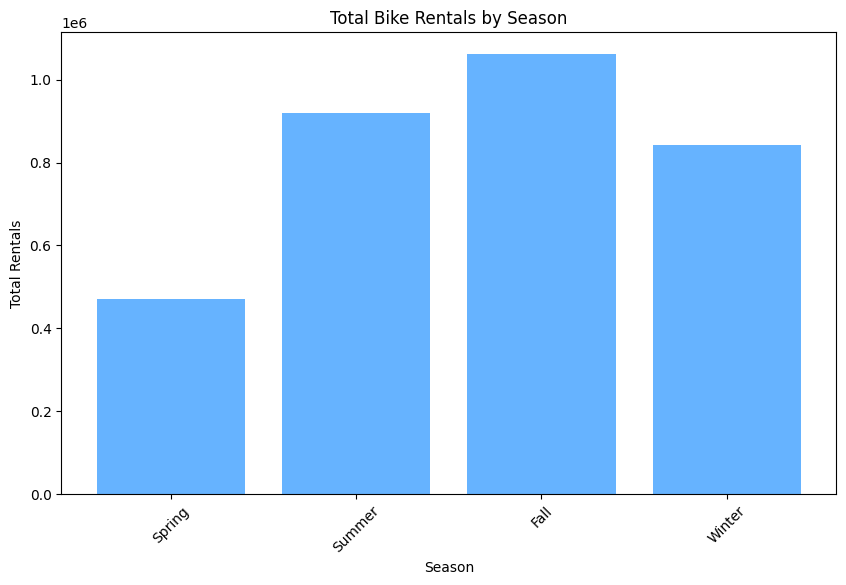

In [71]:
# Visualisasi total penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
plt.bar(rental_per_season.index, rental_per_season.values, color='#66b3ff')  # Menggunakan index dan values
plt.title('Total Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- **Data Penyewaan**: Dari total penyewaan sepeda, musim gugur (Fall) mencatat angka tertinggi dengan 1.061.129 penyewaan, diikuti oleh musim panas (Summer) dengan 918.589 penyewaan. Musim dingin (Winter) menunjukkan total 841.613 penyewaan, sedangkan musim semi (Spring) memiliki angka terendah yaitu 471.348 penyewaan.
- **Pengaruh Musim**: Musim gugur adalah waktu paling populer untuk penyewaan sepeda, diikuti oleh musim panas. Musim dingin masih menunjukkan partisipasi yang baik, sementara musim semi memiliki angka penyewaan terendah.
- **Peningkatan Penyewaan**: Terdapat peningkatan signifikan dalam penyewaan selama musim gugur. Musim semi menunjukkan potensi untuk peningkatan.

Berdasarkan analisis data penyewaan sepeda per musim, disarankan untuk meluncurkan kampanye promosi di musim semi guna menarik lebih banyak pengguna, meningkatkan fasilitas seperti tempat parkir dan pemeliharaan sepeda, serta menyesuaikan acara dan promosi dengan kondisi cuaca. Langkah-langkah ini diharapkan dapat meningkatkan penggunaan sepeda secara keseluruhan sepanjang tahun.

### Pertanyaan 2: Bagaimana perbandingan jumlah penyewaan sepeda pada hari kerja dan akhir pekan? Apakah pengguna casual lebih sering menyewa sepeda pada akhir pekan dibandingkan hari kerja?

In [72]:
# Menghitung total penyewaan sepeda berdasarkan hari kerja dan akhir pekan
workingday_rentals = bike_df.groupby('workingday')[['count', 'casual']].sum().reset_index()

workingday_rentals['day_type'] = workingday_rentals['workingday'].map({0: 'Weekend/Holiday', 1: 'Weekday'})

print(workingday_rentals)

   workingday    count  casual         day_type
0           0  1000269  316732  Weekend/Holiday
1           1  2292410  303285          Weekday


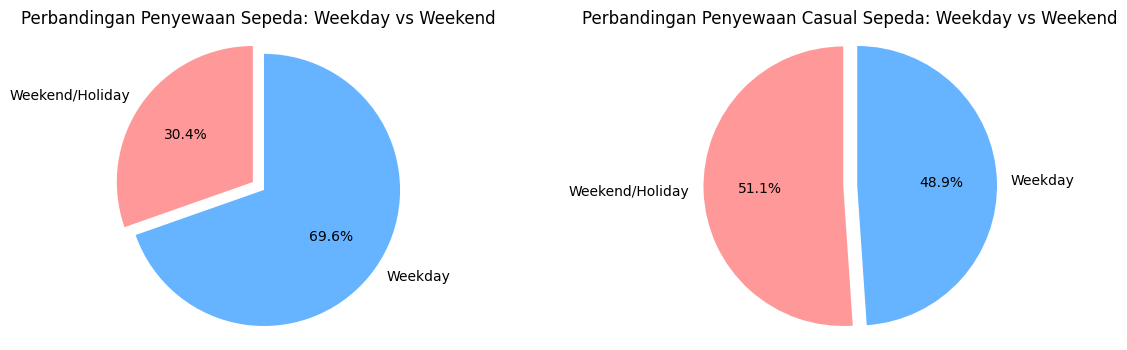

In [73]:
# Data untuk pie chart
labels = workingday_rentals['day_type']
count = workingday_rentals['count']
casual = workingday_rentals['casual']
colors = ['#ff9999', '#66b3ff']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Pie chart 1
ax1.pie(count, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
ax1.axis('equal')
ax1.set_title('Perbandingan Penyewaan Sepeda: Weekday vs Weekend')

# Pie chart 2
ax2.pie(casual, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
ax2.axis('equal')
ax2.set_title('Perbandingan Penyewaan Casual Sepeda: Weekday vs Weekend')

plt.show()

**Insight:**
- Berdasarkan data, 69,6% atau sebanyak 2.292.410 penyewaan sepeda terjadi pada hari kerja, menunjukkan bahwa sepeda lebih sering digunakan untuk keperluan rutin seperti transportasi harian. Sementara itu, 30,4% atau sebanyak 1.000.269 penyewaan terjadi pada akhir pekan atau hari libur, mengindikasikan bahwa meskipun lebih rendah, sepeda tetap diminati untuk aktivitas rekreasi atau bersantai. Perbandingan ini menunjukkan bahwa sepeda digunakan secara signifikan lebih banyak pada hari kerja, namun tetap ada minat yang cukup besar pada akhir pekan.
- Berdasarkan data penyewaan sepeda, pengguna casual lebih sering menyewa sepeda pada akhir pekan dibandingkan hari kerja. Pada akhir pekan atau hari libur, terdapat 316.732 penyewaan oleh pengguna casual, yang berkontribusi sebesar 31,7% dari total penyewaan akhir pekan. Sebaliknya, pada hari kerja, meskipun jumlah penyewaan pengguna casual mencapai 303.285, kontribusinya hanya sebesar 13,2% dari total penyewaan. Hal ini menunjukkan bahwa pengguna casual cenderung lebih aktif menyewa sepeda untuk keperluan rekreasi pada akhir pekan. Sementara itu, pengguna registered mendominasi penyewaan sepeda pada hari kerja dengan 1.989.125 penyewaan, atau 86,8% dari total, yang mengindikasikan bahwa mereka lebih sering menggunakan sepeda sebagai transportasi harian.

## Analisis Lanjutan (Opsional)

In [75]:
bike_df.to_csv("bike_df.csv", index=False)

## Conclusion

- Conclution pertanyaan 1

Analisis data penyewaan sepeda menunjukkan bahwa musim gugur (Fall) adalah yang paling populer, dengan 1.061.129 penyewaan, diikuti musim panas (Summer) dengan 918.589 penyewaan. Musim dingin (Winter) dan musim semi (Spring) memiliki angka penyewaan masing-masing 841.613 dan 471.348.

Peningkatan signifikan terlihat pada musim gugur, sementara musim semi menunjukkan potensi untuk peningkatan. Oleh karena itu, disarankan untuk meluncurkan kampanye promosi di musim semi, meningkatkan fasilitas, dan menyesuaikan acara dengan kondisi cuaca untuk mendorong penggunaan sepeda sepanjang tahun.

- Conclution pertanyaan 2


Sebanyak 69,6% (2.292.410 penyewaan) sepeda terjadi pada hari kerja, menunjukkan penggunaannya untuk transportasi rutin, sedangkan 30,4% (1.000.269 penyewaan) terjadi pada akhir pekan, mencerminkan minat untuk aktivitas rekreasi. Pengguna casual lebih aktif menyewa sepeda pada akhir pekan (316.732 penyewaan) dibandingkan hari kerja (303.285 penyewaan). Sebaliknya, pengguna registered mendominasi penyewaan pada hari kerja.

Untuk meningkatkan penyewaan sepeda di hari kerja, disarankan untuk mengembangkan program loyalitas bagi pengguna casual dan meningkatkan fasilitas, seperti jalur sepeda dan tempat parkir, guna mendorong penggunaan sepeda sebagai alternatif transportasi harian.